**EDA for top 10 Indian food analysis**

*The dataset consists of about 255 Indian dishes and 9 columns associated with each of them.
The 9 columns are as follows:-
name : name of the dish
ingredients : main ingredients used
diet : type of diet - either vegetarian or non vegetarian
prep_time : preparation time
cook_time : cooking time
flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc
course : course of meal - starter, main course, dessert, etc*

**Importing Libraries**

In [1]:
import pandas as pd #data processing .csv files I/O
import numpy as np #linear algebra 
import plotly.express as px #data visualization 
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt #data visualization (2D plots of array)
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator
91

91

**Importing the dataset**

In [2]:
data=pd.read_csv("../input/indian-food/Indian _food.csv")

**To show the entire dataframe**

In [3]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


**Summarize Dataset**

In [4]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [5]:
data.describe() #returns description of the data in  data frame 

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [6]:
data.columns #Get a list of all columns names in dataset 

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [7]:
data.info() #Prints information about the data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


**Checking Null values**

In [8]:
data.isnull().any() # No.of missing values across the entire data frame

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [9]:
data.isnull().sum() #returns the no. of missing values in dataset 

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

*Replace the null values in place nan*

In [10]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [11]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [12]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [13]:
data.shape #returns the no.ofrows and columns in dataset 

(255, 9)

**Univariate analysis**

In [14]:
pie_data = data.diet.value_counts().reset_index()

In [15]:
pie_data.columns = ['diet','count']
fig = px.pie(pie_data, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])
fig.show()


**Data visualization**

In [16]:
sweet_data = data[data['flavor_profile']=='sweet']
final_sweet_data = sweet_data[sweet_data['course']!='dessert']


In [17]:
final_sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


In [18]:
flav_data = data.flavor_profile.value_counts().reset_index()
flav_data.columns = ['flavor_profile', 'prep_time']
fig = px.bar(flav_data,x='flavor_profile',y='prep_time',title='variety of item according to the flavour',
color_discrete_sequence=['green'])
fig.show()

In [19]:
cooking_time= data[['cook_time','name']]

In [20]:
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [21]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [22]:
ten_cook_quickly=cooking_time.head(10)

In [23]:
#cook_data = ten_cook_quickly.cook_time.value_counts().reset_index()

In [24]:
#cook_data.columns = ['cook_time', 'name']
fig = px.bar(ten_cook_quickly,x='cook_time',y='name',title='dishes based on cooking time',
color_discrete_sequence=['green'])
fig.show()

In [25]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [26]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [27]:
tencooking_time_longest=cooking_time_longest.head(10)

In [28]:
import matplotlib.pyplot as plt

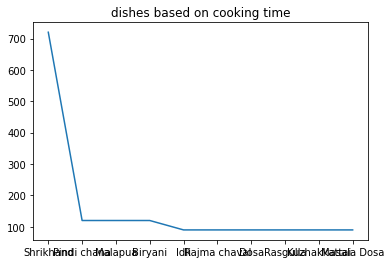

In [29]:
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()


**CONCLUSION**

I  conclude that based on flavour spicy_more is more time to prepare and sour is less time to prepare .
In 
Based on cooking time shrikhand is more time to cook and pani puri is less time to cook.